### 데이터 로드 및 결측치 처리

In [74]:
import pandas as pd

train_data = pd.read_csv("data/train.csv")
train_data.drop(columns=["Id"], inplace=True)

dep_var = "SalePrice"
ind_vars = []
numerical_vars = []
categorical_vars = []

for col in train_data.columns:
    ind_vars.append(col)
    if train_data[col].dtype == "object":
        categorical_vars.append(col)
    else:
        numerical_vars.append(col)

ind_vars.remove(dep_var)
print(numerical_vars)
print(categorical_vars)

null_true_cols = []
for col in train_data.columns:
    null_cnt = len(train_data[train_data[col].isnull() == True])
    if col in numerical_vars and null_cnt > 0:
        print("결측치 {} : {}".format(col, null_cnt))
        null_true_cols.append(col)
null_true_cols

for col in null_true_cols:
    this_mean = train_data[col].mean()
    train_data.loc[(train_data[col].isnull()), col] = this_mean
    
print("결측치 평균값으로 대체함")

train_data

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [78]:
#수치형 데이터를 먼저 표준화함
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(train_data[numerical_vars]) # x객체에 x를 표준화한 데이터를 저장
df = pd.DataFrame(x, columns=numerical_vars)
df[dep_var] = train_data[dep_var]
df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,-0.288653,...,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,208500
1,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,-0.288653,...,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,181500
2,0.073375,-0.093110,0.073480,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,-0.288653,...,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,223500
3,0.309859,-0.456474,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,-0.288653,...,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,140000
4,0.073375,0.633618,0.375148,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,-0.288653,...,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,-0.365633,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.574410,-0.973018,-0.288653,...,-0.752176,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.614439,175000
1456,-0.872563,0.679039,0.266407,-0.071836,0.381743,0.222975,0.151865,0.084843,0.759659,0.722112,...,2.033231,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,1.645210,210000
1457,0.309859,-0.183951,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.574410,-0.369871,-0.288653,...,-0.752176,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,4.953112,-0.489110,1.645210,266500
1458,-0.872563,-0.093110,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.574410,-0.865548,6.092188,...,2.168910,-0.704483,1.473789,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,1.645210,142125


### 이상치 체크

4분위 기준 이상치 수 : 904/1460개


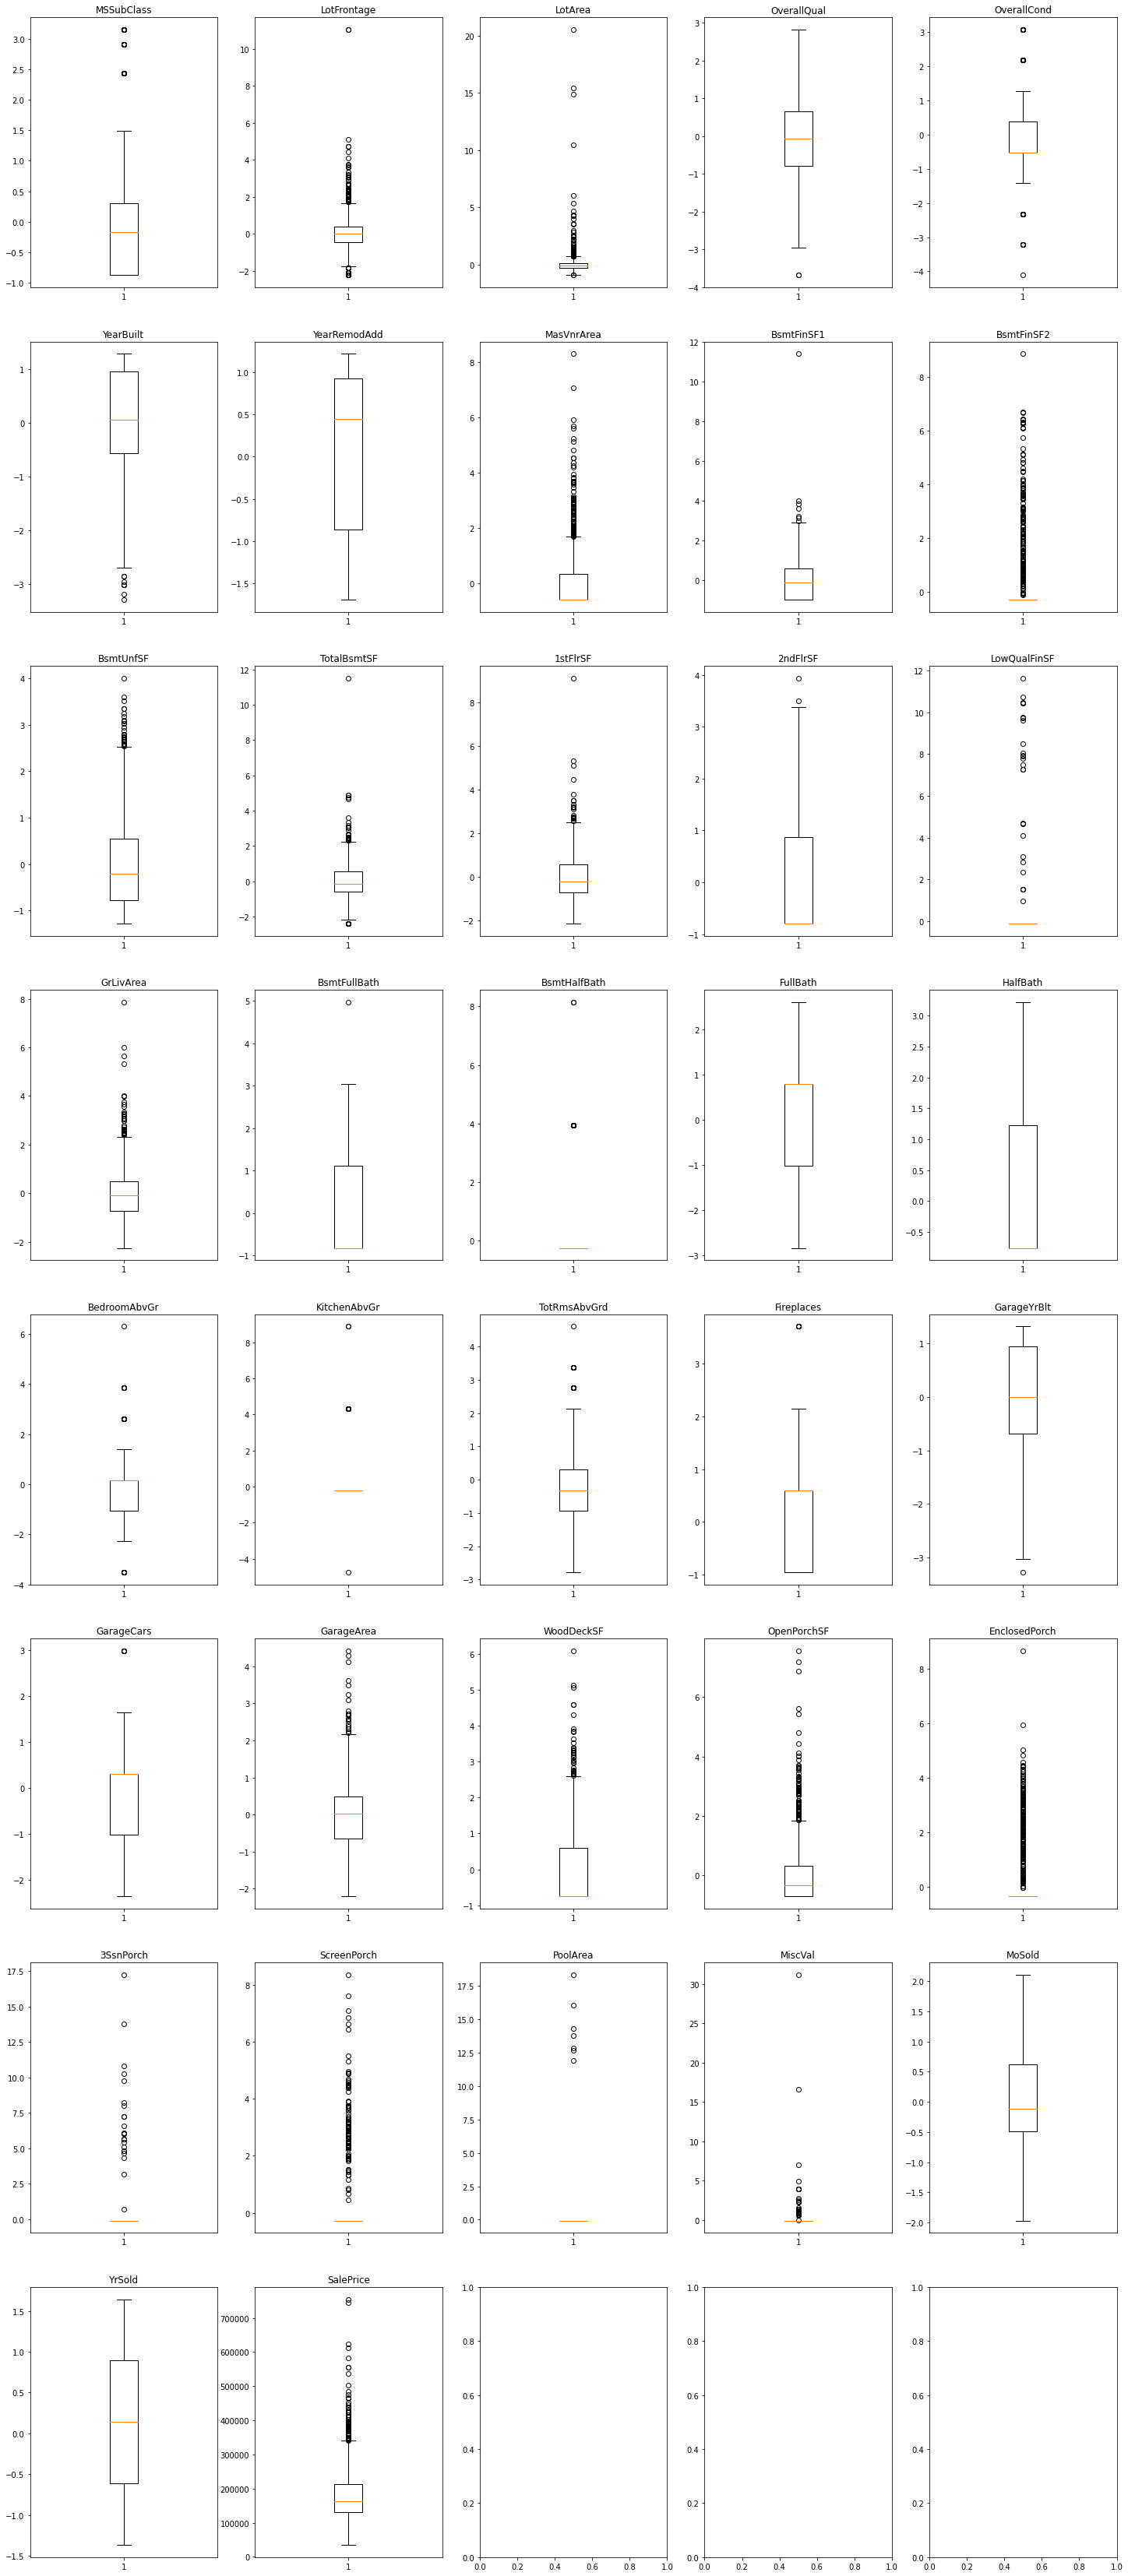

In [76]:
import math
import matplotlib.pyplot as plt
from adptools.preprocessing import get_outlier_df

df_cleaned = get_outlier_df(df)
print("4분위 기준 이상치 수 : {}/{}개".format(df_cleaned["_outlier"].sum(), len(df)))

sp_cols = 5
sp_rows = math.ceil(len(numerical_vars)/sp_cols)
sp_row_no = -1
fig = plt.figure(figsize=(25, 60))
ax = fig.subplots(nrows=sp_rows, ncols=sp_cols)
for idx, col in enumerate(numerical_vars):
    if idx%sp_cols == 0:
        sp_row_no += 1
    ax[sp_row_no][idx%sp_cols].boxplot(df[col])
    ax[sp_row_no][idx%sp_cols].set_title(col)

plt.show()

#이상치가 의미 있는 데이터로 보이며 그 수도 너무 많음. 4분위수 이상치 제거는 오히려 역효과

## 변수선택 or 차원 축소

In [77]:
from adptools.VariableSelector import VariableSelector

ind_vars = numerical_vars.remove(dep_var)
selector = VariableSelector(numerical_vars, dep_var, train_data)
selected_vars = selector.backward_elimination()

Alert! Too many x variables! (less than 30 variables are recommended)
It will may occur some errors!


MoSold 변수를 제거합니다.
후보 독립변수들 : 
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '_1stFlrSF', '_2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '_3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


후진제거법에 의해 선택된 최종 변수들 : 
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '_1stFlrSF', '_2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Firepla

In [86]:
#범주형 변수를 더미 변수로 변환
dms = pd.get_dummies(train_data[categorical_vars])
df = pd.concat([df[selected_vars], dms], axis=1)
df[dep_var] = train_data[dep_var]

In [121]:
from adptools.pca import Reducer
ind_vars = df.columns.to_list()
ind_vars.remove(dep_var)
reducer = Reducer(ind_vars, dep_var, df, n_components=10)
# reducer.scree_plot(dpi=120)
# principal_df = reducer.principal_df
# principal_df

## 여러 모델로 돌려보기

In [109]:
from sklearn.model_selection import train_test_split

ind_vars = df.columns.to_list()
ind_vars.remove(dep_var)
X_train, X_test, y_train, y_test = train_test_split(df[ind_vars], df[dep_var], test_size=0.2)

In [126]:
import time
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import minmax_scale

start_time = time.time()
model = GradientBoostingRegressor(n_estimators=1000)
model.fit(X_train, y_train)
predicted = model.predict(X_test)

pred = pd.DataFrame(data=predicted, columns=["predict"])
pred[dep_var] = y_test.to_list()
pred["predict_scaled"] = minmax_scale(pred["predict"], (pred["predict"].min(), pred["predict"].max()))
pred["residual"] = pred[dep_var] - pred["predict_scaled"]
end_time = time.time()

print("모델링 시간 : {:.2f}초".format(end_time - start_time))
display(pred)
pred.describe()

모델링 시간 : 5.26초


,predict,SalePrice,predict_scaled,residual
0,296551.145871,318061,296551.145871,21509.854129
1,82956.941252,89500,82956.941252,6543.058748
2,178125.590244,185000,178125.590244,6874.409756
3,264228.854312,266500,264228.854312,2271.145688
4,180012.759281,176000,180012.759281,-4012.759281
...,...,...,...,...
287,244190.986017,277000,244190.986017,32809.013983
288,127033.261759,141000,127033.261759,13966.738241
289,45255.928412,35311,45255.928412,-9944.928412
290,177305.978543,162900,177305.978543,-14405.978543


,predict,SalePrice,predict_scaled,residual
count,292.000000,292.000000,292.000000,292.000000
mean,180644.609227,181266.136986,180644.609227,621.527759
std,70398.710367,73877.237379,70398.710367,22747.142996
min,45255.928412,35311.000000,45255.928412,-144241.800100
25%,127023.935011,130000.000000,127023.935011,-9040.677703
50%,164296.885095,167950.000000,164296.885095,814.042463
75%,221536.926346,219407.500000,221536.926346,9923.854844
max,465379.474899,451950.000000,465379.474899,158689.696597


In [127]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(pred[dep_var], pred["predict"])
mse

516046782.08567435

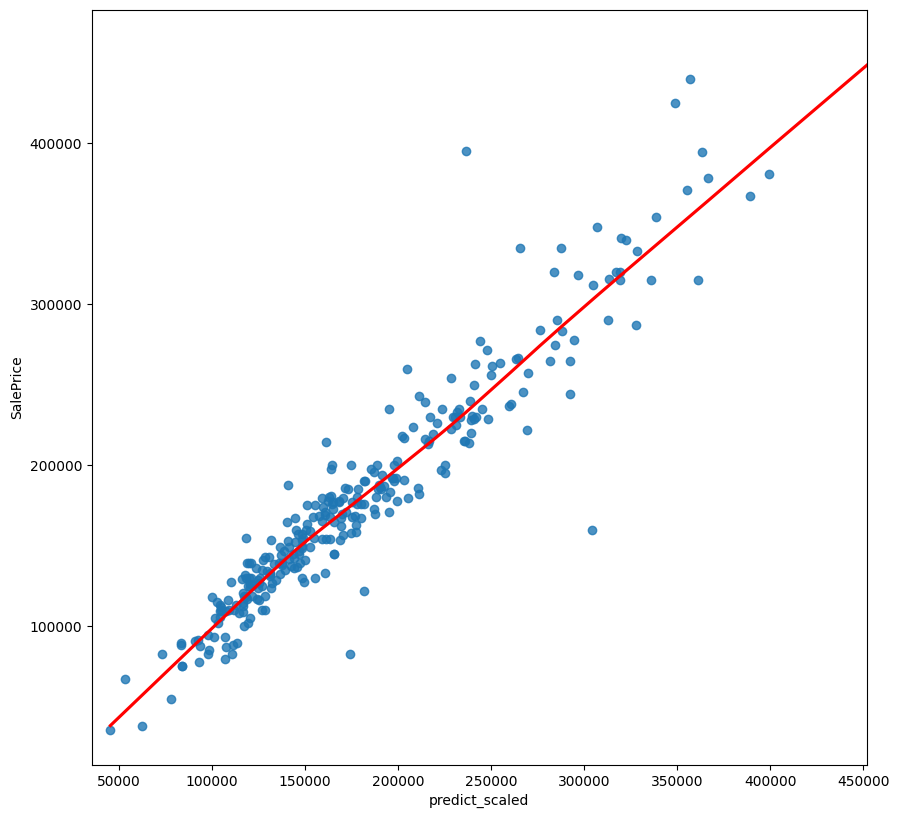

In [128]:
import seaborn as sns

plt.figure(figsize=(10, 10), dpi=100)
sns.regplot(x=pred["predict_scaled"], y=pred[dep_var], lowess=True, line_kws={'color': 'red'})
plt.xlim((pred[dep_var].min(), pred[dep_var].max()))
# plt.scatter(pred["predict"], pred[dep_var])
plt.show()

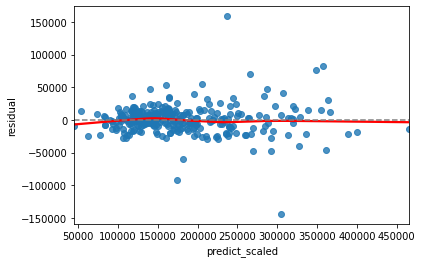

In [129]:
import seaborn as sns

sns.regplot(x=pred["predict_scaled"], y=pred["residual"], lowess=True, line_kws={'color': 'red'})
plt.plot([pred["predict_scaled"].min(), pred["predict_scaled"].max()], [0, 0], '--', color='grey')
plt.show()

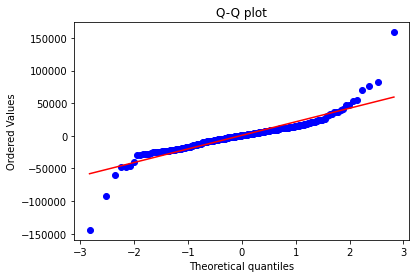

In [130]:
from scipy import stats
stats.probplot(pred["residual"], plot=plt)
plt.title("Q-Q plot")
plt.show()

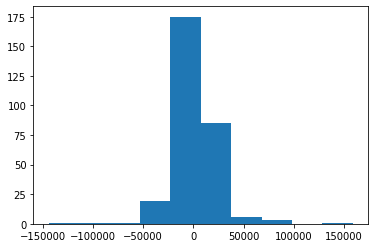

In [131]:
plt.hist(pred["residual"])
plt.show()

In [132]:
challenge_df = pd.read_csv("data/test.csv")

null_true_cols = []
for col in challenge_df.columns:
    null_cnt = len(challenge_df[challenge_df[col].isnull() == True])
    if col in numerical_vars and null_cnt > 0:
        print("결측치 {} : {}".format(col, null_cnt))
        null_true_cols.append(col)

for col in null_true_cols:
    this_mean = challenge_df[col].mean()
    challenge_df.loc[(challenge_df[col].isnull()), col] = this_mean

dms = pd.get_dummies(challenge_df[categorical_vars])
challenge_df = pd.concat([challenge_df[selected_vars], dms], axis=1)
x = StandardScaler().fit_transform(challenge_df) # x객체에 x를 표준화한 데이터를 저장
challenge_df = pd.DataFrame(x, columns=challenge_df.columns)

결측치 LotFrontage : 227
결측치 MasVnrArea : 15
결측치 BsmtFinSF1 : 1
결측치 BsmtFinSF2 : 1
결측치 BsmtUnfSF : 1
결측치 TotalBsmtSF : 1
결측치 BsmtFullBath : 2
결측치 BsmtHalfBath : 2
결측치 GarageYrBlt : 78
결측치 GarageCars : 1
결측치 GarageArea : 1


In [133]:
# len(challenge_df.columns), len(X_train.columns)

for t_col in X_train.columns:
    if t_col not in challenge_df.columns:
        challenge_df[t_col] = 0

# len(challenge_df.columns), len(X_train.columns)

challenge_predicted = model.predict(challenge_df)
challenge_predicted

array([ 76686.58863989, 101010.06784472, 151106.5123517 , ...,
       136112.95547157, 110050.86334993, 231071.2539984 ])

In [134]:
submit_df = pd.DataFrame()
submit_df["Id"] = challenge_df.index + 1461
submit_df[dep_var] = challenge_predicted
submit_df
submit_df.to_csv("210915_hrdkdh_submission.csv", index=False)

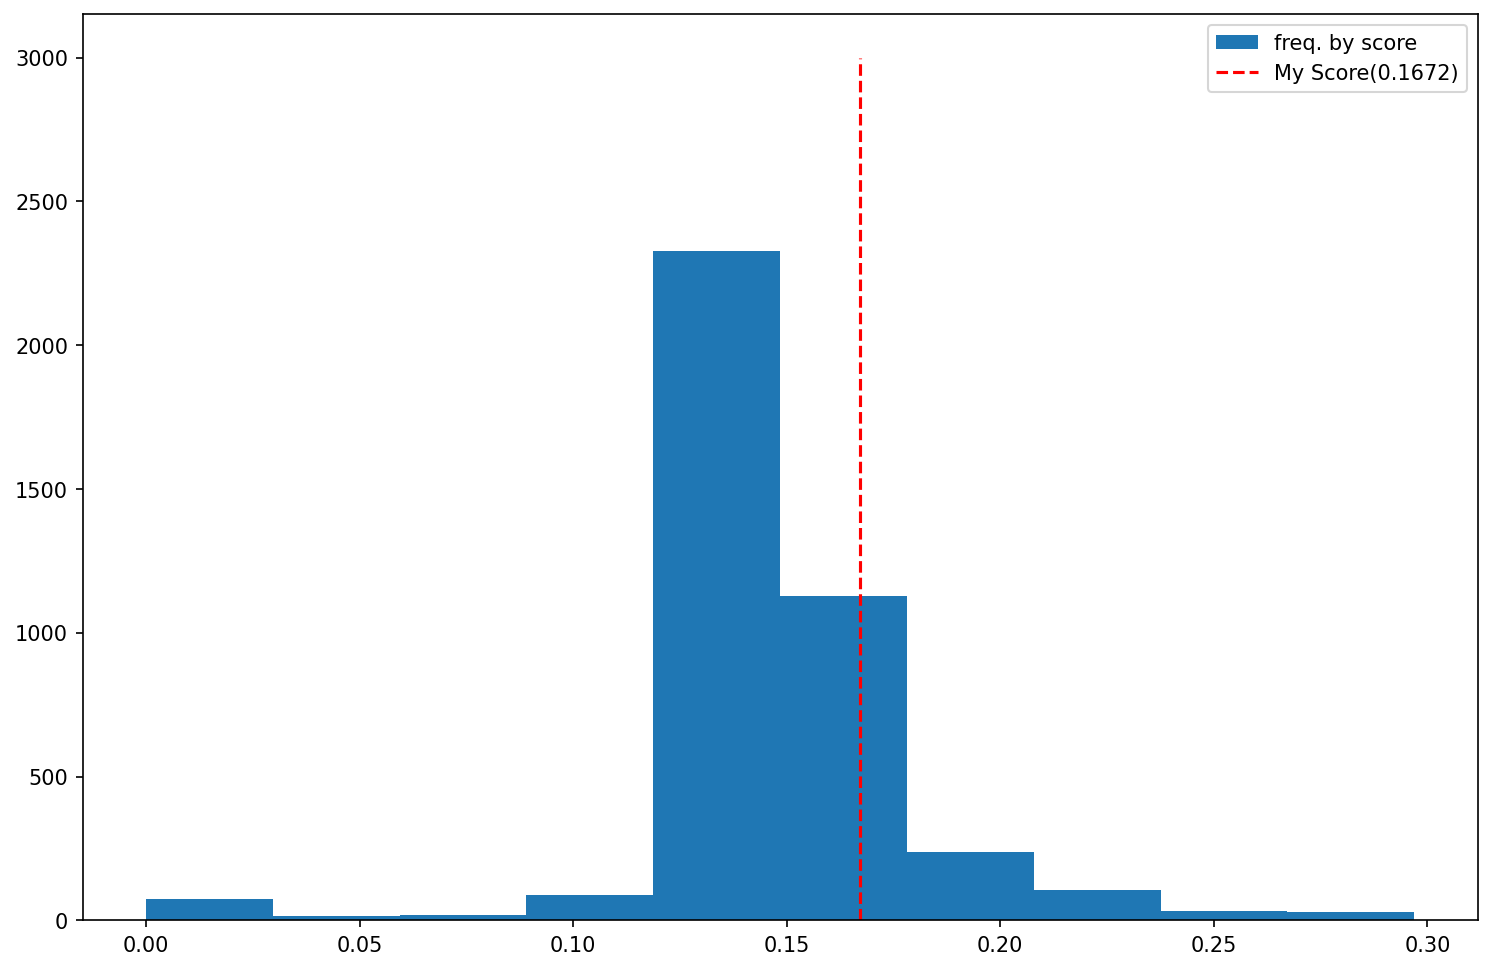

In [103]:
import pandas as pd
import matplotlib.pyplot as plt

ldr_brd = pd.read_csv("/Users/hrdkdh/Downloads/house-prices-advanced-regression-techniques-publicleaderboard 2.csv")

ldr_brd_drop_list = ldr_brd[(ldr_brd["Score"] > 0.3)].index
ldr_brd.drop(index=ldr_brd_drop_list, inplace=True)
my_score = ldr_brd.loc[(ldr_brd["TeamName"] == "hrdkdh"), "Score"].values[0]

plt.figure(figsize=(12, 8), dpi=150)
plt.hist(ldr_brd.iloc[:-1, 3], label="freq. by score")
plt.vlines(my_score, 0, 3000, colors="red", linestyles="dashed", label="My Score({:.4f})".format(my_score))
plt.legend()
plt.show()